# ML Trader

In [1]:
from utils.packages import *
from utils.variables import *
from utils.i_o import *
from utils.dir_slope import *
from utils.engine import *
from utils.loops import *
from utils.order import *
import winsound
from tqdm import tqdm
tqdm.pandas()

In [2]:
%%time
data = get_date_list(data)
# data = read_data(data)

Wall time: 999 µs


In [3]:
data = run_engine(data)

100%|█████████████████████████████████| 68590/68590 [00:00<00:00, 69616.95it/s]


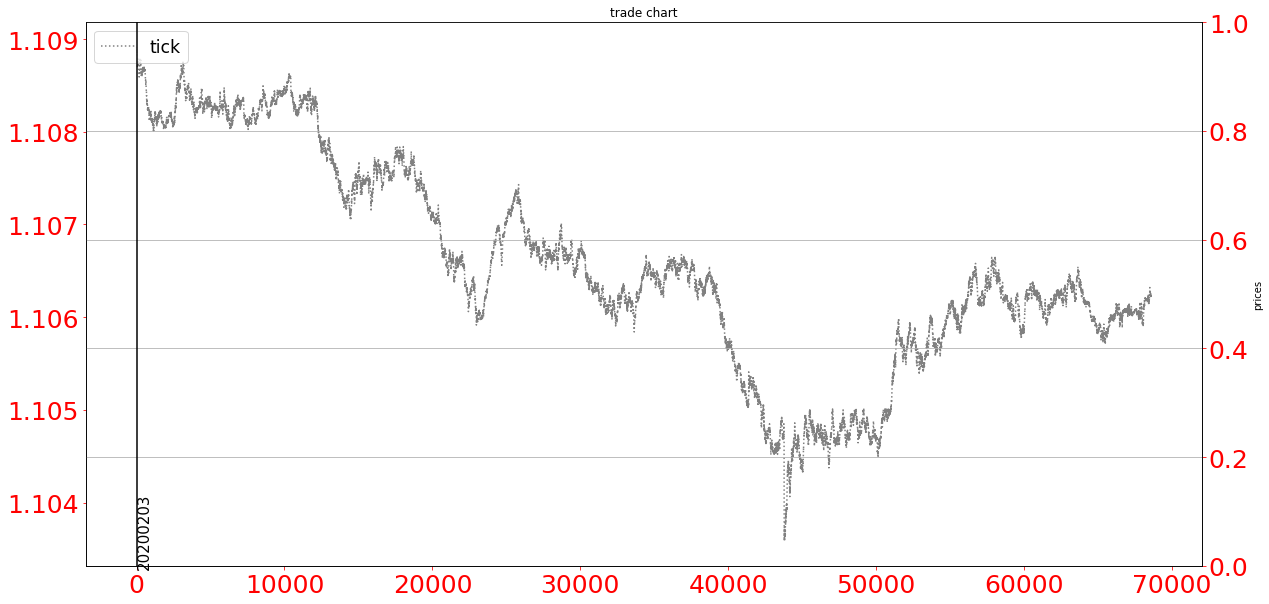

-----------------------------------------------------


KeyError: 'report_df'

In [4]:
if data["plot"]:
#     data = adjust_plot_list_lengths(data)
    plot_graph(data)
    
print('-----------------------------------------------------')
print_report(data)
print('-----------------------------------------------------')
print(data['report_df'].groupby(['month_val'])['pls'].sum())
print('-----------------------------------------------------')
print(data['report_df']['close_type'].value_counts())
print('-----------------------------------------------------')
data['report_df']

winsound.PlaySound('C:\\Windows\\Media\\tada.wav', winsound.SND_ASYNC)

import glob

for file in glob.glob("data/*.csv"):
    if file not in ['data\\eurusd_2021.csv', 'data\\full_df.csv']:
        df = pd.read_csv(file)
        print('----------------------------')
        print(f'file : {file}')
        print(df['pls'].sum())
        print(df.groupby(['month_val'])['pls'].sum())
        print('----------------------------')

In [ ]:
data['report_df'][['date', 'ord_types', 'close_type', 'pls']]